In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# Paths
image_folder = '/content/unzipped_folder/character images/'
excel_path = os.path.join(image_folder, 'character dataset.xlsx')

# Load Excel file
df = pd.read_excel(excel_path)
df.columns = df.columns.str.strip()  # Remove extra spaces if any

print(df.head())  # Should show 'filename' and 'label' (or similar column names)


             filename label
0  characters/001.png     1
1  characters/002.png     0
2  characters/003.png     2
3  characters/004.png     1
4  characters/005.png     3


In [30]:
df.rename(columns={'Image': 'filename', 'Character': 'label'}, inplace=True)

In [32]:
# Image size
img_size = (64, 64)

X = []
y = []

# Ensure 'label' column contains only strings before encoding
df['label'] = df['label'].astype(str)

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Load each image
for _, row in df.iterrows():
    img_path = os.path.join(image_folder, row['filename'])

    try:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0
        X.append(img)
        y.append(row['label_encoded'])
    except Exception as e:
        print(f"Failed to load {img_path}: {e}")

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images with shape: {X.shape}")

Loaded 500 images with shape: (500, 64, 64, 3)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(le.classes_)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:]),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.0079 - loss: 4.2159 - val_accuracy: 0.0100 - val_loss: 4.1327
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.0266 - loss: 4.1165 - val_accuracy: 0.0100 - val_loss: 4.1741
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.0118 - loss: 4.0991 - val_accuracy: 0.0100 - val_loss: 4.2358
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.0378 - loss: 4.0739 - val_accuracy: 0.0100 - val_loss: 4.2090
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.0378 - loss: 4.0406 - val_accuracy: 0.0100 - val_loss: 4.2093
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.0660 - loss: 4.0080 - val_accuracy: 0.0000e+00 - val_loss: 4.2195
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.0780 - loss: 3.9331 - val_accuracy: 0.0200 - val_loss: 4.2503
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.1253 - loss: 3.8140 - val_accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0370 - loss: 4.4598
Test Accuracy: 3.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


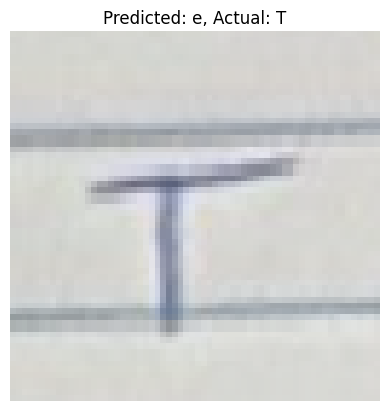

In [35]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Show prediction
idx = 23
pred = model.predict(X_test[idx:idx+1])
pred_label = le.inverse_transform([np.argmax(pred)])

plt.imshow(X_test[idx])
plt.title(f"Predicted: {pred_label[0]}, Actual: {le.inverse_transform([y_test[idx]])[0]}")
plt.axis('off')
plt.show()
